# Compare results Jul-28 to Aug-31
last edit Sep-14, 2022

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

# (1) Load data:
All runs of $(e,e'\pi)$ data and all runs of $(e,e'\pi n)$ - as with a small number of runs normalization is off

Reading files from /Users/erezcohen/Desktop/data/BAND/tmp/Results_July28_2022/
reading Untagged_SIDIS_ratio_Zmin0.340_Zmean_pips0.350_pims0.350_Zmax0.360.csv
reading Untagged_SIDIS_ratio_Zmin0.590_Zmean_pips0.600_pims0.600_Zmax0.610.csv
reading Untagged_SIDIS_ratio_Zmin0.790_Zmean_pips0.799_pims0.799_Zmax0.810.csv
reading Untagged_SIDIS_ratio_Zmin0.640_Zmean_pips0.650_pims0.650_Zmax0.660.csv
reading Untagged_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460.csv
reading Untagged_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510.csv
reading Untagged_SIDIS_ratio_Zmin0.690_Zmean_pips0.700_pims0.700_Zmax0.710.csv
reading Untagged_SIDIS_ratio_Zmin0.540_Zmean_pips0.550_pims0.550_Zmax0.560.csv
reading Untagged_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410.csv
reading Untagged_SIDIS_ratio_Zmin0.290_Zmean_pips0.305_pims0.305_Zmax0.310.csv
reading Untagged_SIDIS_ratio_Zmin0.740_Zmean_pips0.750_pims0.750_Zmax0.760.csv
Done.
Reading files from /Users/erezcohen/Desktop/da

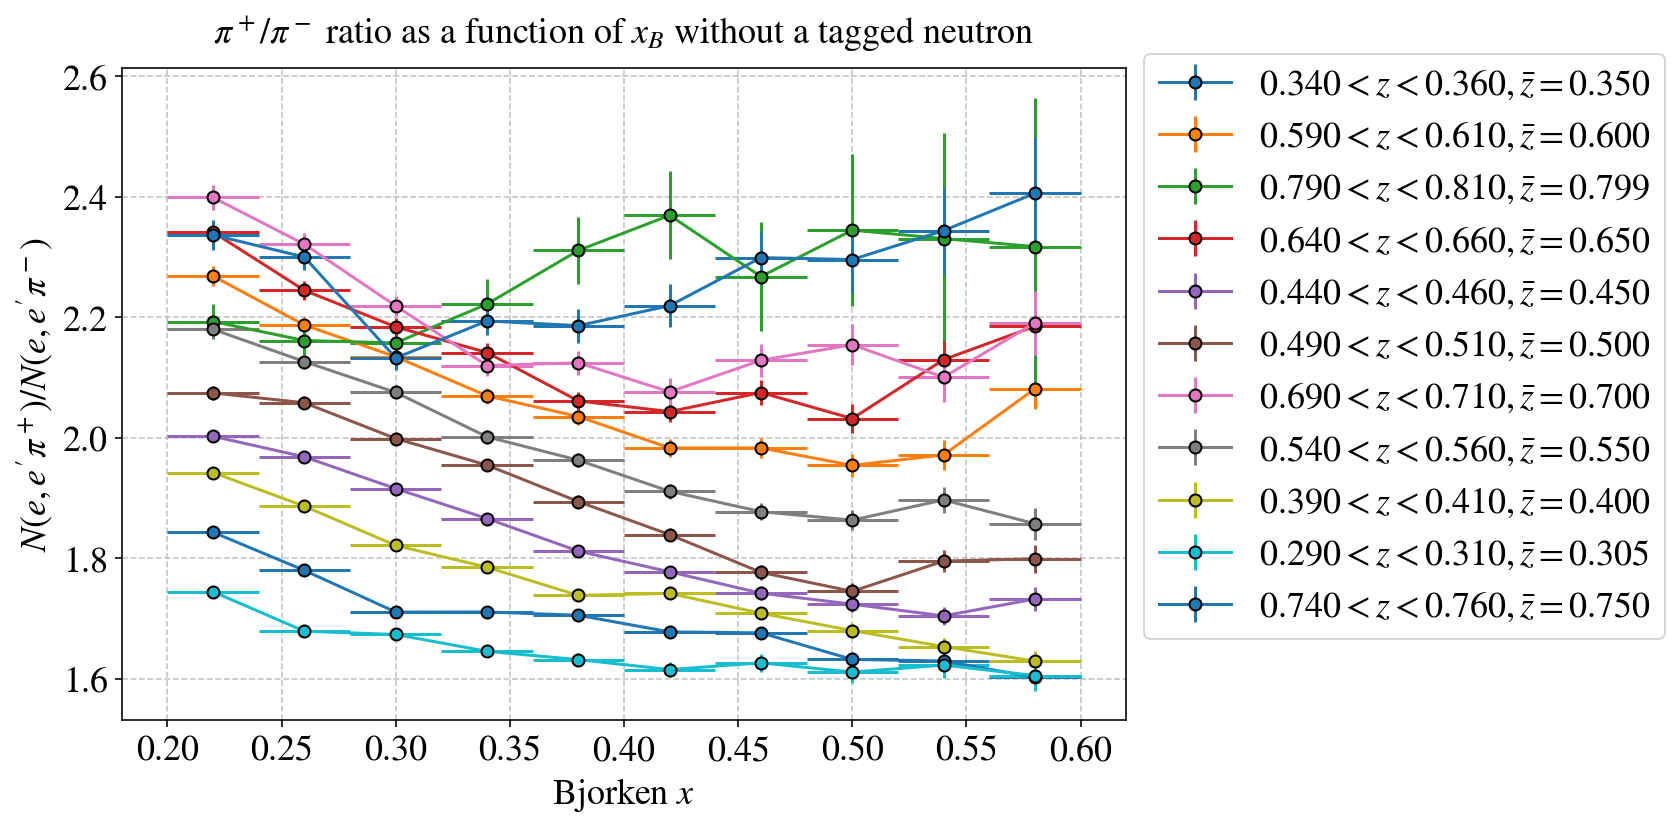

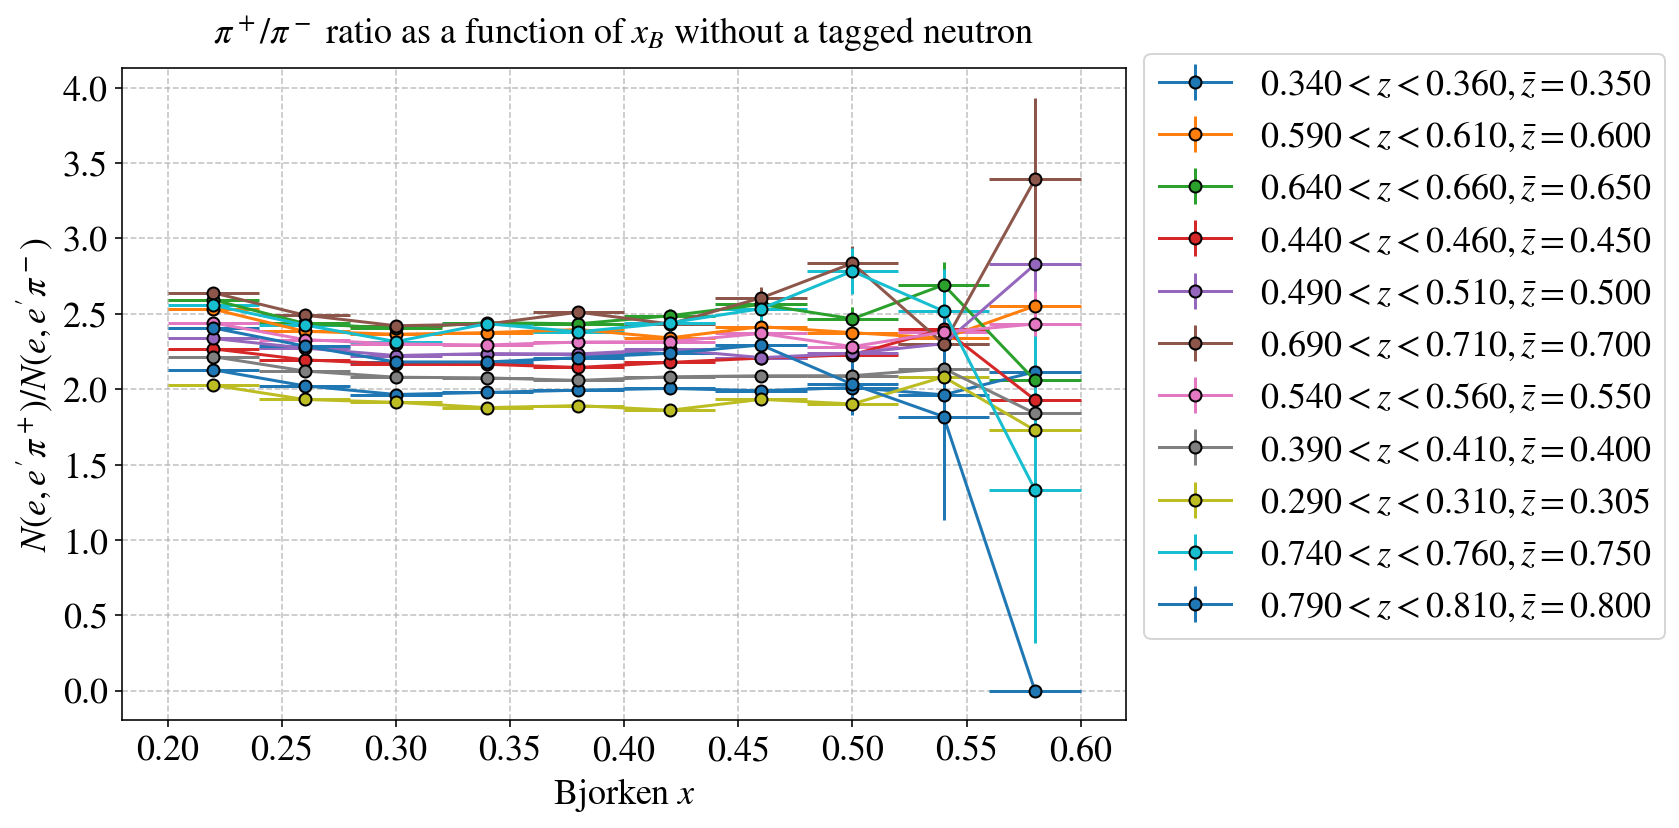

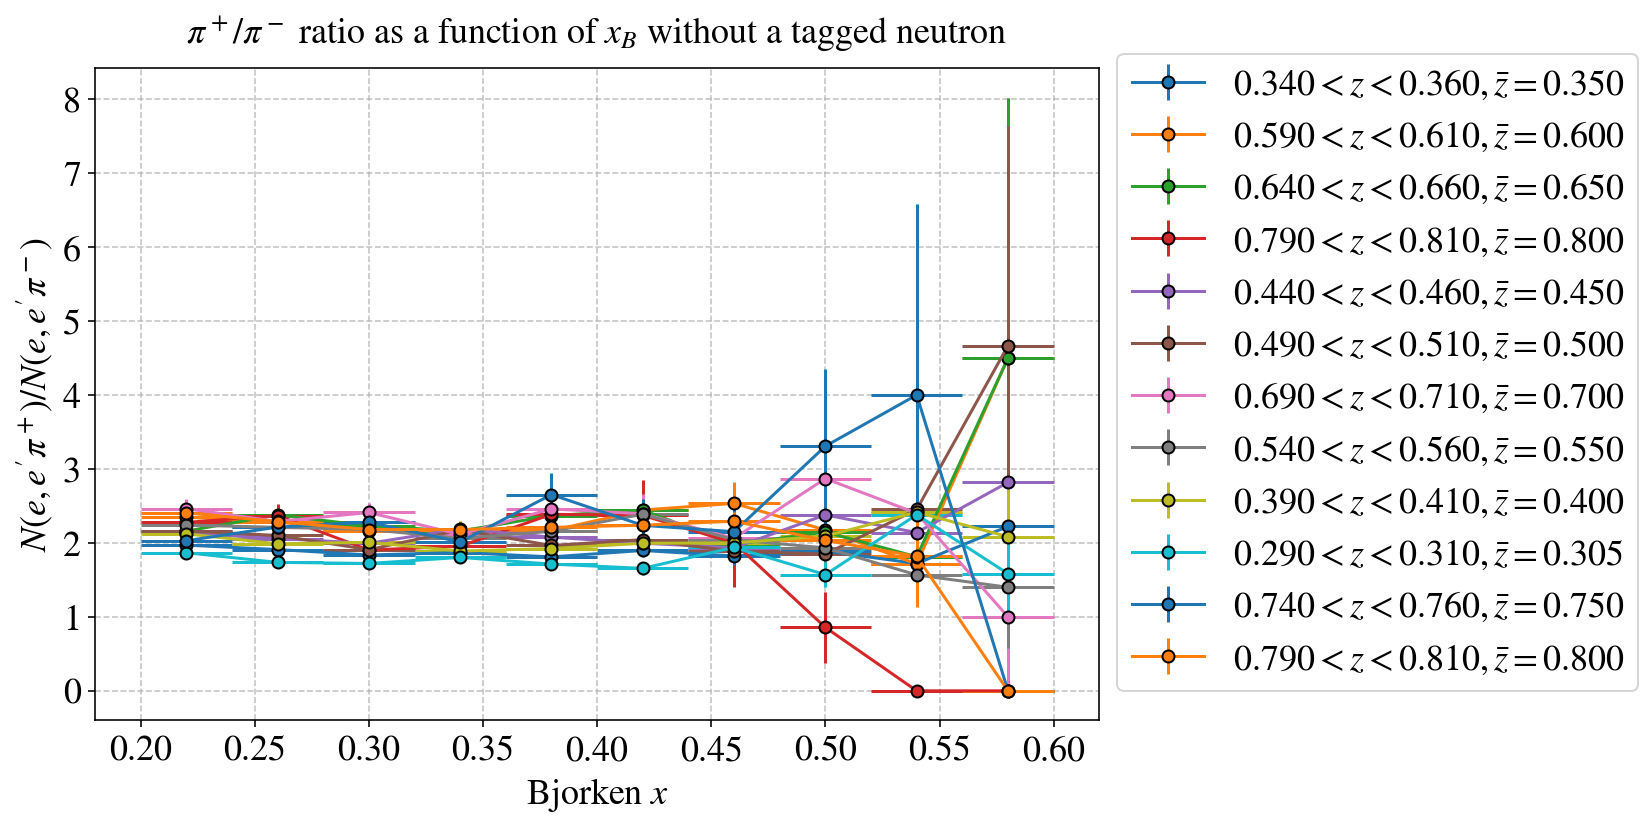

In [3]:
prefix = 'Untagged_SIDIS_ratio_'
SIDIS_res = dict()
SIDIS_res['Jul-28'] = load_SIDIS_ratio(prefix = prefix, doPlotResults=True,
                                 data_path='/Users/erezcohen/Desktop/data/BAND/tmp/Results_July28_2022/')

SIDIS_res['Aug-31'] = load_SIDIS_ratio(prefix = prefix, doPlotResults=True,
                                 data_path='/Users/erezcohen/Desktop/data/BAND/tmp/Results_Aug31_2022/')

SIDIS_res['Sep-11'] = load_SIDIS_ratio(prefix = prefix, doPlotResults=True,
                                 data_path='/Users/erezcohen/Desktop/data/BAND/Results/')

In [4]:
z_arr,z_err_arr,R_arr,R_errup_arr,R_errdw_arr = dict(),dict(),dict(),dict(),dict()
for suffix in ['Jul-28','Aug-31','Sep-11']:
    # print(suffix)
    results = SIDIS_res[suffix]
    z_arr[suffix],z_err_arr[suffix],R_arr[suffix],R_errup_arr[suffix],R_errdw_arr[suffix] = [],[],[],[],[]
    for key in results.keys():
        # print(key)
        z_min = float(key[4:9])
        z_max = float(key[-4:])

        # print(z_min,'<z<',z_max)
        res_x034 = results[key][np.abs(results[key]['$x_B$']-0.34)<0.02]
        # print(results[key])
        R,dR_up,dR_dw = float(res_x034['$R$']),float(res_x034['$\Delta R_{+}$']),float(res_x034['$\Delta R_{+}$'])
        # print(R,dR_up,dR_dw)
        
        R_arr[suffix].append( R )
        R_errup_arr[suffix].append( dR_up )
        R_errdw_arr[suffix].append( dR_dw )        

        z_arr[suffix].append( (z_max + z_min)/2 )
        z_err_arr[suffix].append( (z_max - z_min)/2 )
        
print('Done.')

Done.


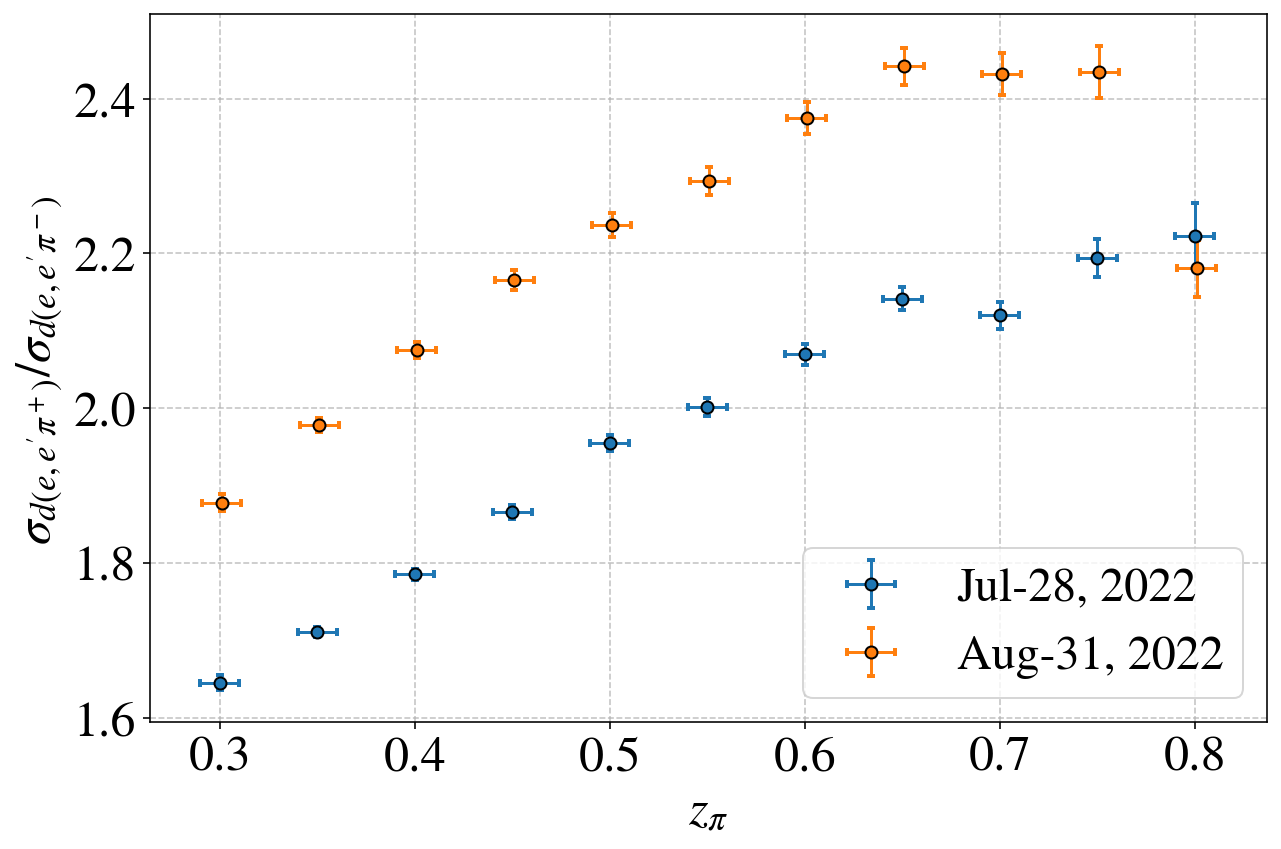

In [7]:
fig = plt.figure(figsize=(9,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)

for suffix,sufname,sufidx in zip(['Jul-28','Aug-31'],#,'Sep-11'
                         ['Jul-28, 2022','Aug-31, 2022'],# ,'Sep-22 (1 run)'
                                 [0,1]):#,2
    plt.errorbar(x=np.array(z_arr[suffix])+sufidx*0.001, xerr=z_err_arr[suffix],
                 y=R_arr[suffix], yerr=(R_errup_arr[suffix],R_errdw_arr[suffix]),
                 marker='o',markeredgecolor='k',linestyle='None',
                 label=sufname, capthick=2, capsize=2)

set_axes(ax,'$z_\\pi$',
             "$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ",
             do_add_grid=True, do_add_legend=True)
ax.legend(loc='lower right',fontsize=24);